# Organising the code

In [635]:
data1=pd.read_csv('housing_clean_1.csv')
data1.head()

,Unnamed: 0,price,space,room,bedroom,furniture,latitude,longitude
0,0,107100,28.0,1,1,0,41.724521,44.753788
1,2,257000,72.0,3,1,1,41.689502,44.820050
2,3,157200,53.0,2,1,0,41.677084,44.817222
3,4,237200,80.0,3,2,0,41.682883,44.823815
4,5,158200,60.0,2,1,0,41.768762,44.724123


In [636]:
data1.drop(['Unnamed: 0'],axis=1,inplace=True)


In [637]:
data1.head()

,price,space,room,bedroom,furniture,latitude,longitude
0,107100,28.0,1,1,0,41.724521,44.753788
1,257000,72.0,3,1,1,41.689502,44.820050
2,157200,53.0,2,1,0,41.677084,44.817222
3,237200,80.0,3,2,0,41.682883,44.823815
4,158200,60.0,2,1,0,41.768762,44.724123


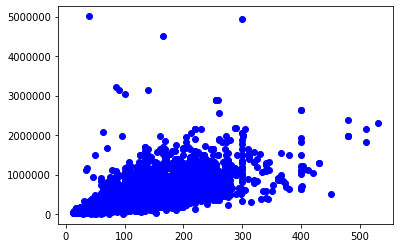

In [702]:
plt.scatter(data1['space'],data1['price'],c='b')

In [665]:
t=max(np.array(data1['price']))
idx=data1[data1['price']==t].index[0]
data1.drop(data1.index[idx],axis=0,inplace=True)

In [666]:
data1.reset_index(inplace=True)

In [667]:
data1.drop(['level_0','index'],axis=1,inplace=True)

In [697]:
data1[data1['room']==12]
data1.drop(data1.index[1424],axis=0,inplace=True)
data1.reset_index()

,index,price,space,room,bedroom,furniture,latitude,longitude
0,0,107100,28.00,1,1,0,41.724521,44.753788
1,1,257000,72.00,3,1,1,41.689502,44.820050
2,2,157200,53.00,2,1,0,41.677084,44.817222
3,3,237200,80.00,3,2,0,41.682883,44.823815
4,4,158200,60.00,2,1,0,41.768762,44.724123
...,...,...,...,...,...,...,...,...
29196,29198,179200,75.00,2,1,0,41.761308,44.789730
29197,29199,126600,53.00,2,1,0,41.731884,44.836876
29198,29200,62400,25.75,1,1,0,41.731884,44.836876
29199,29201,167200,70.00,3,2,0,41.731884,44.836876


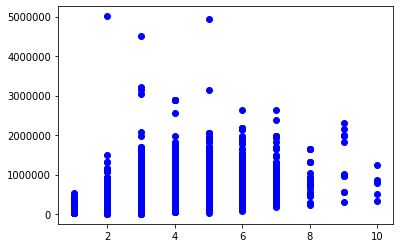

In [698]:
plt.scatter(data1['room'],data1['price'],c='b')

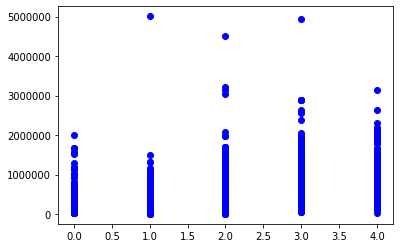

In [700]:
plt.scatter(data1['bedroom'],data1['price'],c='b')

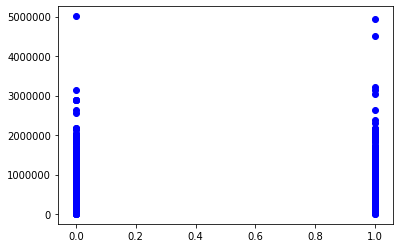

In [701]:
plt.scatter(data1['furniture'],data1['price'],c='b')

In [672]:
max(np.array(data1['price']))
# data1[data1['price']==5931200].index[0]
# data1.drop(data1.index[9610],axis=0,inplace=True)

5008600

In [703]:
Y=data1['price']
X=data1.drop(['price','latitude','longitude'],axis=1)

In [704]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

## Linear Regression

In [705]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)
lreg.score(x_test,y_test)

0.580660278620537

## Polynomial Regression

In [706]:
from sklearn.preprocessing import PolynomialFeatures
l1=LinearRegression()

poly=PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
l1.fit(x_poly_train,y_train)
x_poly_test=poly.transform(x_test)
y_poly_pred=l1.predict(x_poly_test)
l1.score(x_poly_test,y_test)

0.5851458116194035

## Ridge Regression

In [707]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.01,normalize=True)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
ridge.score(x_test,y_test)

0.5802564912943146

## Lasso Regression

In [708]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)
y_lasso_pred=lasso.predict(x_test)
lasso.score(x_test,y_test)

0.5806566930608072

## Elastic Net

In [709]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
en.fit(x_train,y_train)
y_en_pred=en.predict(x_test)
en.score(x_test,y_test)

0.5728960140702528

Text(0.5, 1.0, 'Residual plot')

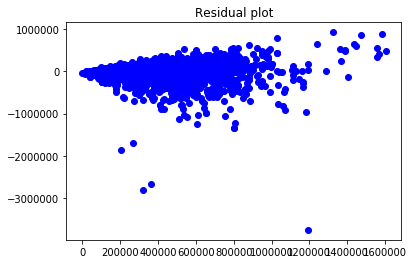

In [710]:
x_plot = plt.scatter(y_lasso_pred, (y_lasso_pred - y_test), c='b')

plt.title('Residual plot')

In [681]:
import seaborn as sns
A=['Linear Regression','Polynomial Regression','Ridge Regression','Lasso Regression','Elastic Net']
B=[lreg.score(x_test,y_test),l1.score(x_poly_test,y_test),ridge.score(x_test,y_test),lasso.score(x_test,y_test),en.score(x_test,y_test) ]
def plot_score(A,B):
    sns.barplot(x=A,y=B)

In [711]:
X

,space,room,bedroom,furniture
0,28.00,1,1,0
1,72.00,3,1,1
2,53.00,2,1,0
3,80.00,3,2,0
4,60.00,2,1,0
...,...,...,...,...
29198,75.00,2,1,0
29199,53.00,2,1,0
29200,25.75,1,1,0
29201,70.00,3,2,0


In [690]:
x_try=np.array([[100.0,2,2,0],[100.0,2,2,1]])
lasso.predict(x_try)

array([354707.36037121, 400690.45375581])

In [722]:
X['bedroom'].value_counts()

2    12188
1    10460
3     4837
4      950
0      766
Name: bedroom, dtype: int64

In [725]:
import pickle
data={"reg_model":lreg,"poly_reg":l1,"poly_trans":poly,"ridge":ridge,"lasso":lasso,"el_net":en}
with open ('saved_steps.pk1','wb') as file:
    pickle.dump(data,file)


In [726]:
with open ('saved_steps.pk1','rb') as file:
    data=pickle.load(file)
lasso_loaded=data["lasso"]
print(lasso_loaded.predict(x_try))

[352191.4285197  397398.55808649]


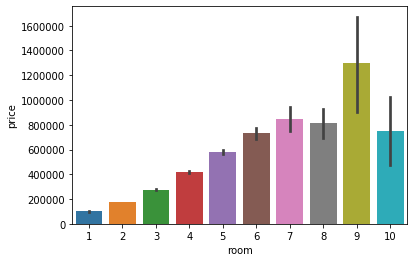

In [719]:
sns.barplot(x='room',y='price',data=data1)
plt.show()

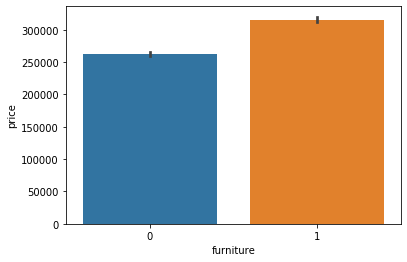

In [720]:
sns.barplot(x='furniture',y='price',data=data1)
plt.show()

In [724]:
np.array([1,2,3,4]).mean()

2.5